<a href="https://colab.research.google.com/github/kcl-bhi-is-01/ML_FHR_main/blob/main/ML_FHR_S04_L03_v01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Overall, this Python tutorial demonstrates how to construct a random forest classifier on the iris dataset, visualize the decision tree using graphviz and matplotlib, and evaluate the performance using accuracy and confusion matrix. The visualization provides a clear understanding of how the random forest makes decisions based on the input features.

First, we need to import the necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.display import Image
from six import StringIO
import pydotplus

Next, we can load the iris dataset and split it into training and testing sets:

In [2]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

We can then create an instance of the RandomForestClassifier and fit it to the training data:

In [4]:
clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
clf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=3, random_state=42)

To visualize the decision tree, we need to generate a DOT file using the export_graphviz function:

In [5]:
dot_data = StringIO()
export_graphviz(clf.estimators_[0], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = data.feature_names, class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('iris.png')

True

This will generate an image file called iris.png in the current directory. We can display this image using matplotlib:

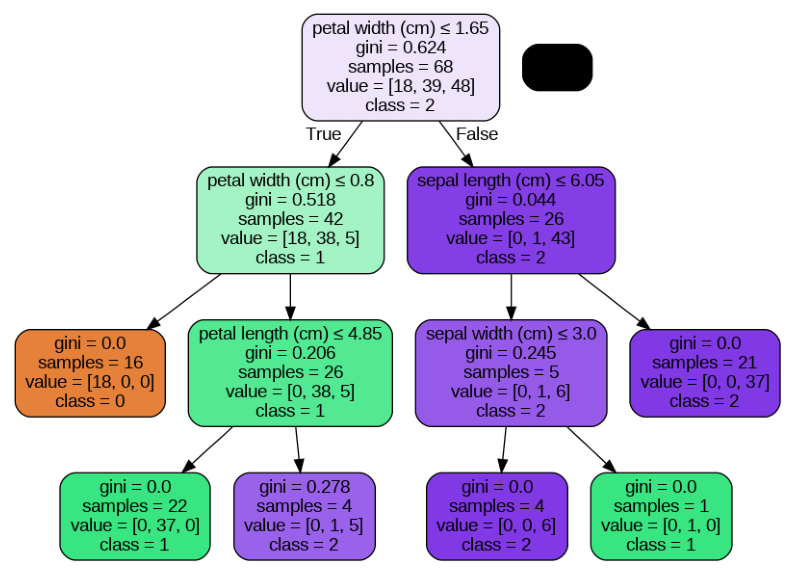

In [6]:
plt.figure(figsize = (10, 10))
plt.imshow(plt.imread('iris.png'))
plt.axis('off')
plt.show()

Finally, we can evaluate the performance of the random forest on the testing data:

In [8]:
y_pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Confusion matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


This will output the accuracy and confusion matrix of the random forest on the testing data.